# K-Means Clustering 


In [30]:
# Load library
import numpy as np
import pandas as pd

In [2]:
# Load dataset in pandas dataframe
df = pd.read_csv("credit-card-holder-data.csv")

In [3]:
# Show several 
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


This is a dataset for developing a customer segmentation. The dataset summarizes the usage behavior of active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- BALANCE: Balance amount left in their account to make purchases.
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- PURCHASES: Amount of purchases made from account.
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go (i.e., one-time payment for a purchase).
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment (i.e., multiple payments for a purchase). Observation: PURCHASES = ONEOFF_PURCHASE + INSTALLMENT_PURCHASES).
- CASH_ADVANCE: Cash in advance given by the user (a cash advance is when taking money out of the ATM using credit card instead of debit card or ATM card).
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid.
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advanced".
- PURCHASES_TRX: Number of purchase transactions made.
- CREDIT_LIMIT: Limit of Credit Card for user.
- PAYMENTS: Amount of payment done by user (i.e., payment for the use of credit card)
- MINIMUM_PAYMENTS: Minimum amount of payments made by user.
- PRC_FULL_PAYMENT: Percent of full payment paid by user.
- TENURE: Tenure of credit card service for user (i.e., how long (in months) you should have held the credit card before they will grant you credit).

# EDA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

There's no null data and no string type

In [5]:
df.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4474.500000,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2583.786788,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2237.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,4474.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,6711.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,8949.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


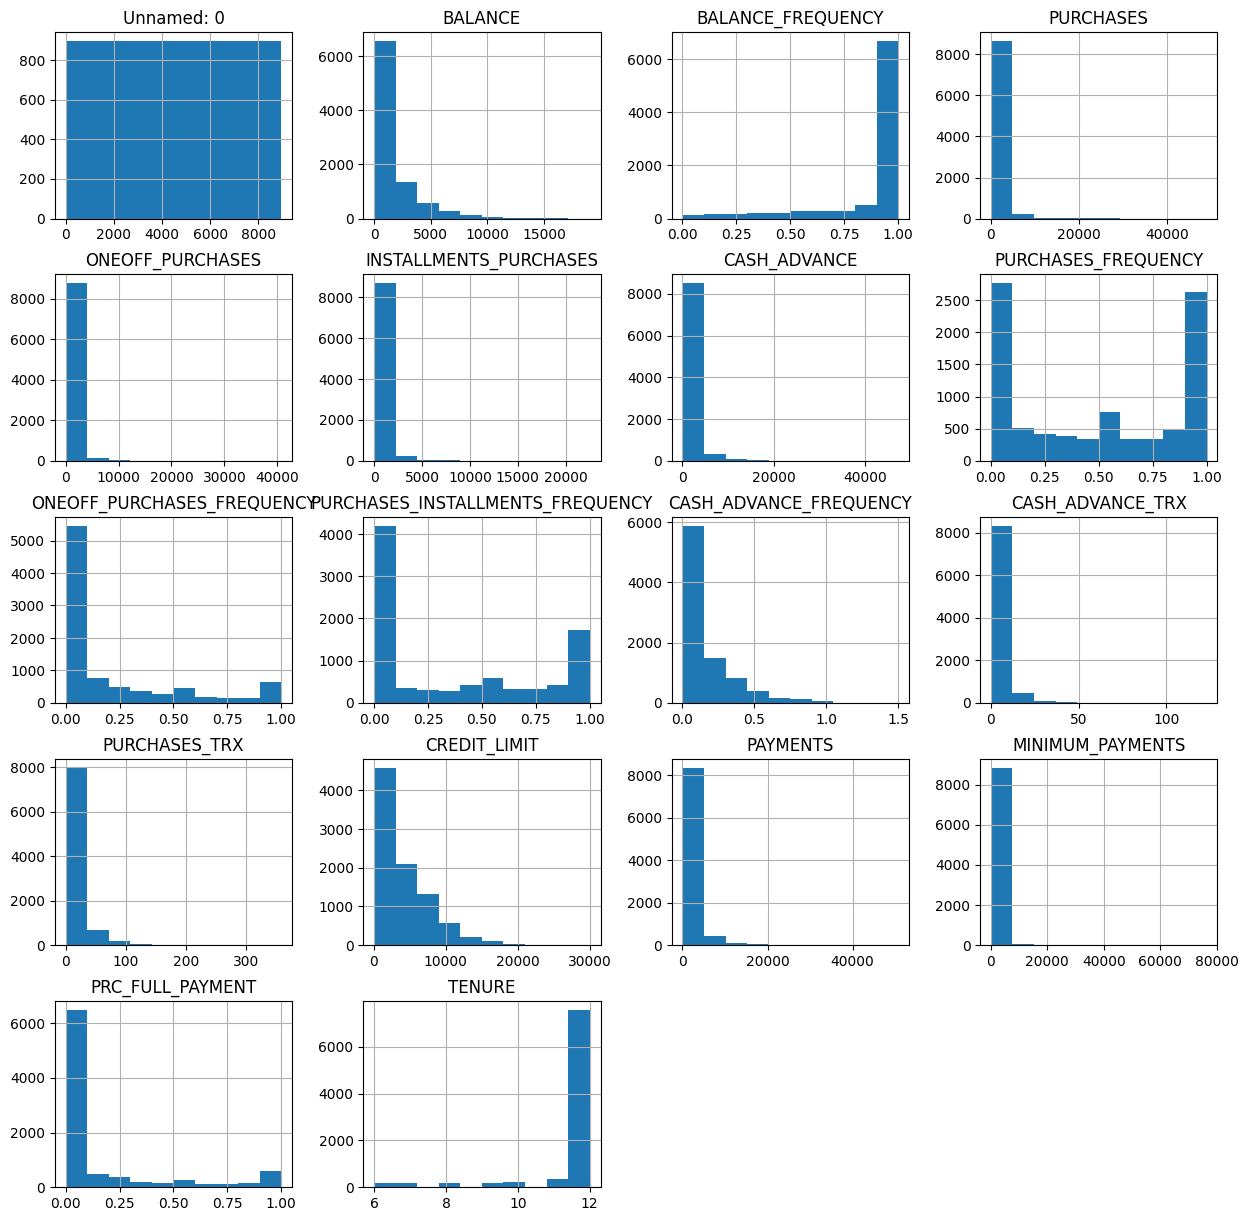

In [7]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 15))
plt.show()

<Axes: >

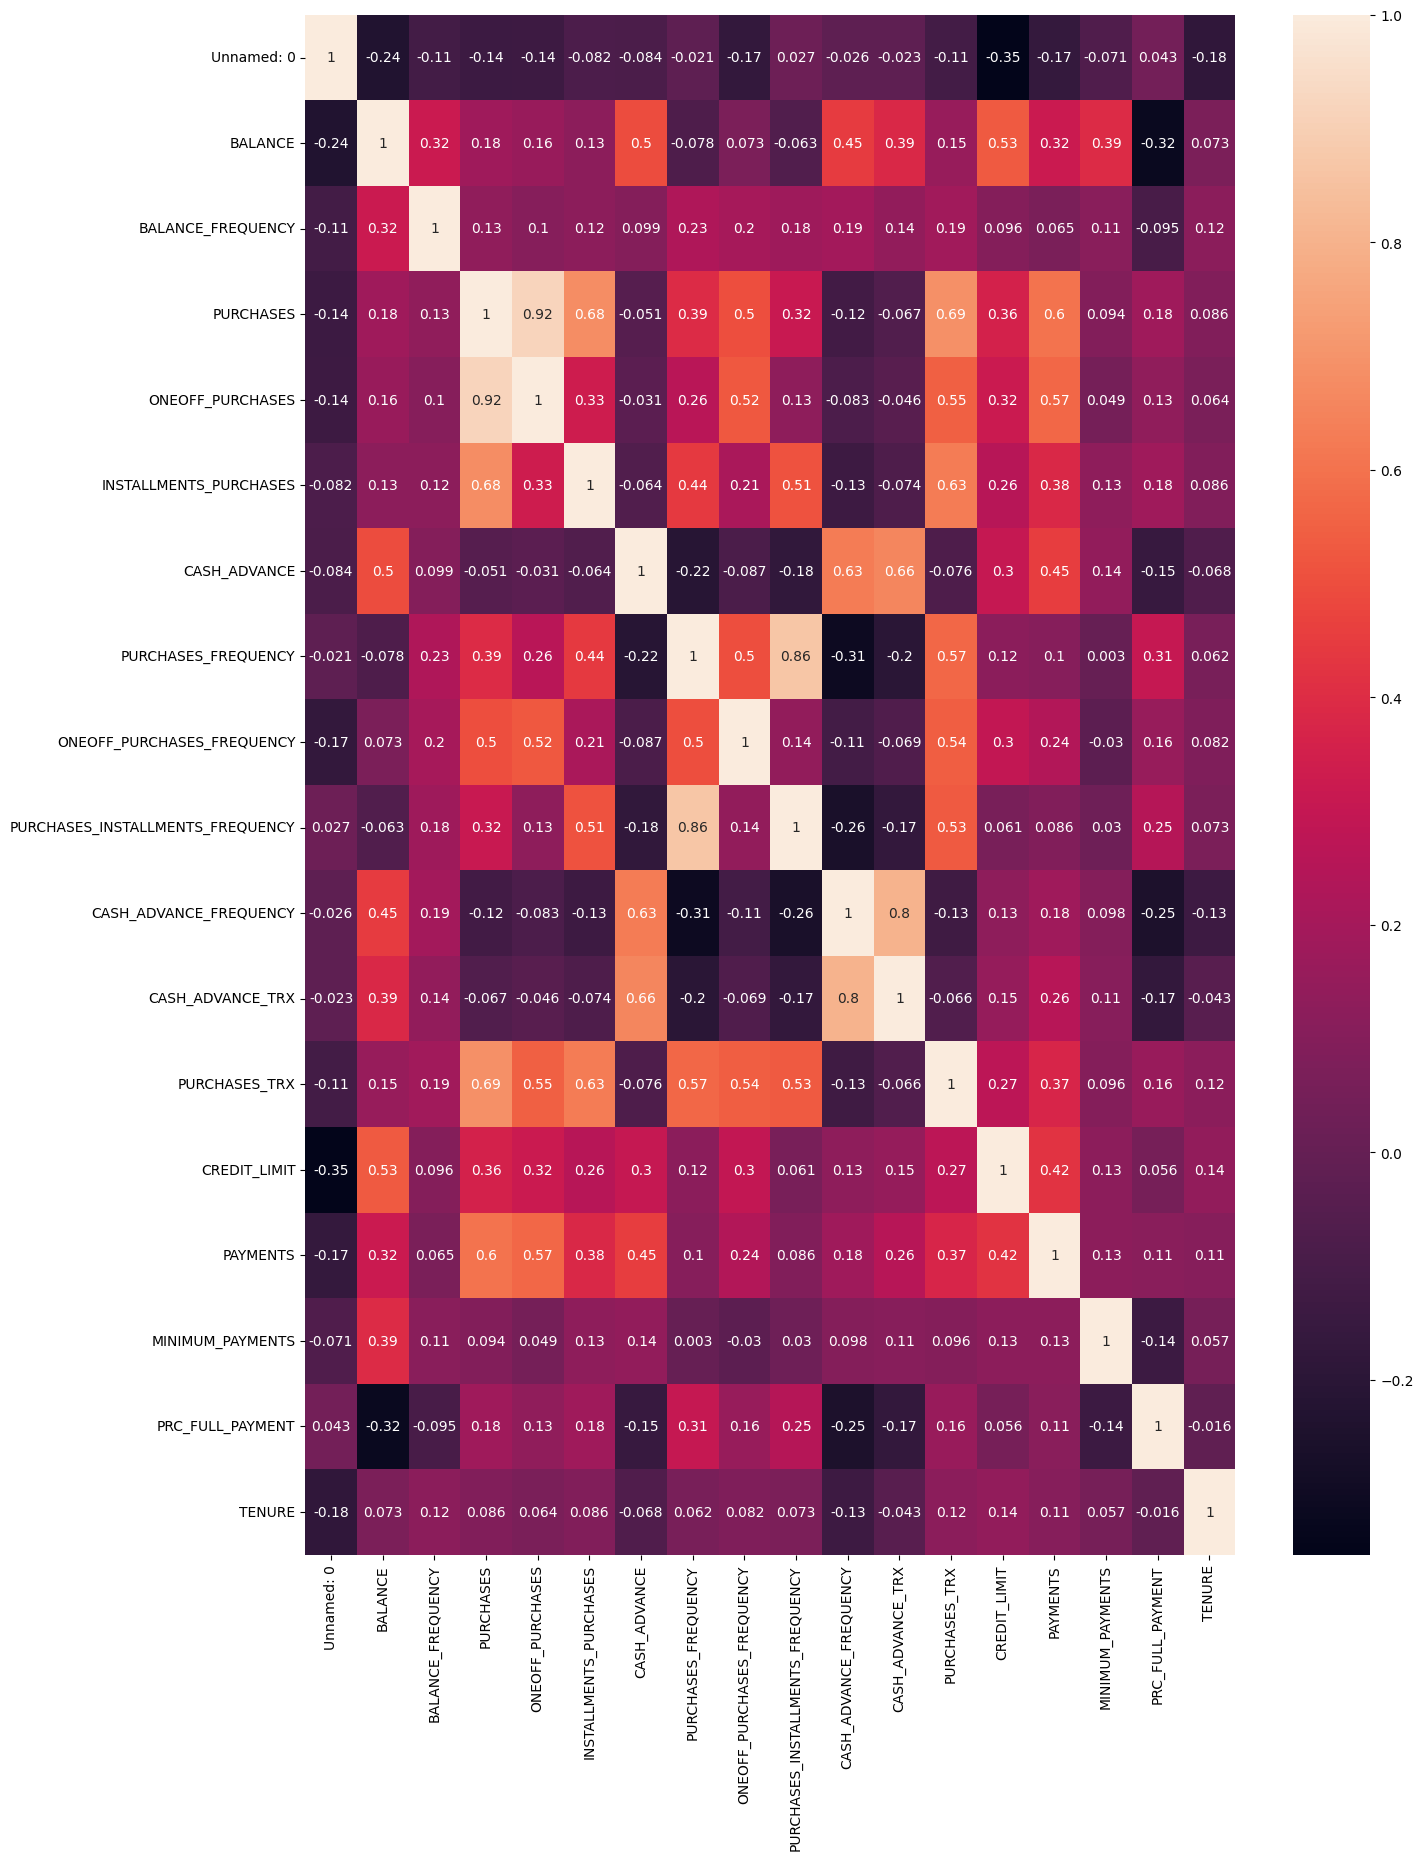

In [13]:
import seaborn as sns

plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

# Data Preprocessing

In [14]:
data = df.copy()

In [15]:
# Import StandardScaler to standardize the data features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit (calculate mean and standard deviation) and transform (substract mean and divide by std) the data
scaled_data = scaler.fit_transform(data.values)

# Data Training 

Use Elbow method to determine the number of clusters K


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

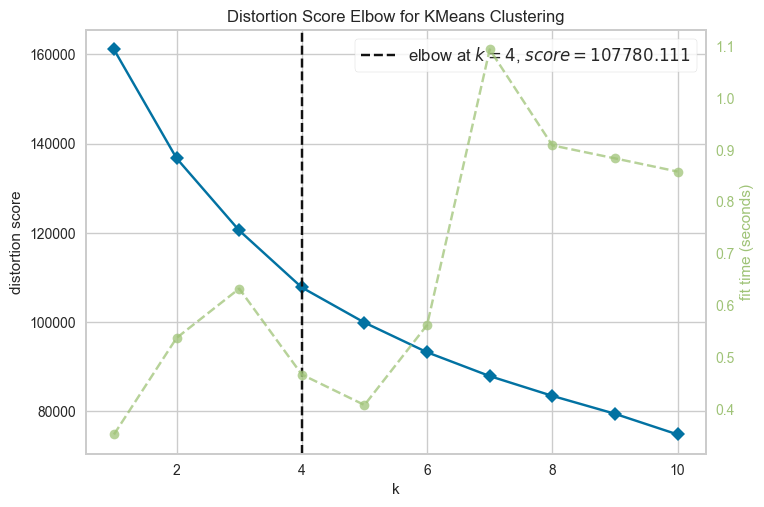

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Find K 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elbow_method = KElbowVisualizer(KMeans(), k=(1,11), timings=True, locate_elbow=True)
elbow_method.fit(scaled_data)
elbow_method.show()

In [22]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(scaled_data)

kmeans_model.predict(scaled_data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 3, 0, ..., 0, 1, 1], dtype=int32)

# Visualization

Visualize in two ways

## PCA

In [23]:
from sklearn.decomposition import PCA

# Find all principal components (i.e, eigen vectors of the covariance matrix, and eigen values) of the data, and equal to the number of data features.
pca = PCA(n_components=len(data.columns))
pca.fit(scaled_data)

PCA(n_components=18)

In [24]:
# Print the amount of variance carried in each principal components (eigenvalues). This is the eigen values.
print("Amount of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_))

# Print the ratio of ammount of variance carried in each principal components (eigen values). The ratio is calculated by dividing the eigenvalue of each component by the sum of eigenvalues
print("\nRatio of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_ratio_))

# Sum of all ratios must be 1
print("\nCummulative sum of all ratios :\n" + str(pca.explained_variance_ratio_.cumsum()))

# Note: by ranking the eigenvectors in order of their eigenvalues, highest to lowest, we get the principal components in order of significance.

Amount of variance carried in each principal components (eigen values) :
[4.68299658e+00 3.49219892e+00 1.50373598e+00 1.38787048e+00
 1.08670343e+00 1.04389589e+00 8.76789015e-01 7.46495154e-01
 6.63114180e-01 6.28425713e-01 5.20633319e-01 4.02851918e-01
 2.99963253e-01 2.41946034e-01 2.06767211e-01 1.72219376e-01
 4.53933082e-02 1.16466503e-05]

Ratio of variance carried in each principal components (eigen values) :
[2.60137408e-01 1.93989374e-01 8.35315536e-02 7.70953003e-02
 6.03656672e-02 5.79877364e-02 4.87050583e-02 4.14673192e-02
 3.68355605e-02 3.49086388e-02 2.89208416e-02 2.23781615e-02
 1.66627632e-02 1.34399445e-02 1.14857838e-02 9.56667412e-03
 2.52156869e-03 6.46963835e-07]

Cummulative sum of all ratios :
[0.26013741 0.45412678 0.53765833 0.61475364 0.6751193  0.73310704
 0.7818121  0.82327942 0.86011498 0.89502362 0.92394446 0.94632262
 0.96298538 0.97642533 0.98791111 0.99747778 0.99999935 1.        ]


### 3D PCA

In [25]:
# We test the three most important principal components as they cover 53.8% (0.538) of the data variance.
pca3 = PCA(n_components=3)

# Fit (i.e., construct the 3-dimensional PCA space) and transform (i.e., project the original data points into the 3-dimensional PCA space).
pca3_data = pca3.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 3-dimensional PCA space, namely "pca_1", "pca_2" and "pca_3"
pca3_df = pd.DataFrame(pca3_data, columns=["pca_1", "pca_2", "pca_3"])

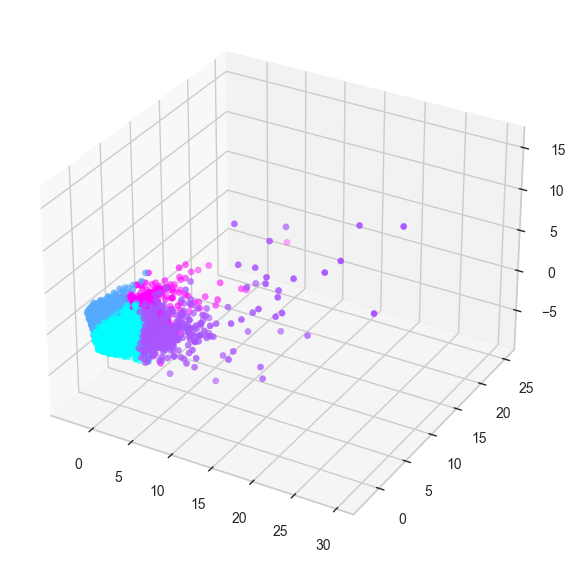

In [26]:
# Plot the data points in the 3-dimensional space with feature pca_1, pca_2 and pca_3, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca3_df.pca_1, pca3_df.pca_2, pca3_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

### 2D PCA


In [27]:
# We test the two most important principal components as they cover 45.0% (0.454) of the data variance.
pca2 = PCA(n_components=2)

# Fit (i.e., construct the 2-dimensional PCA space) and transform (i.e., project the original data points into the 2-dimensional PCA space).
pca2_data = pca2.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 2-dimensional PCA space, namely "pca_1" and "pca_2"
pca2_df = pd.DataFrame(pca2_data, columns=["pca_1", "pca_2"])

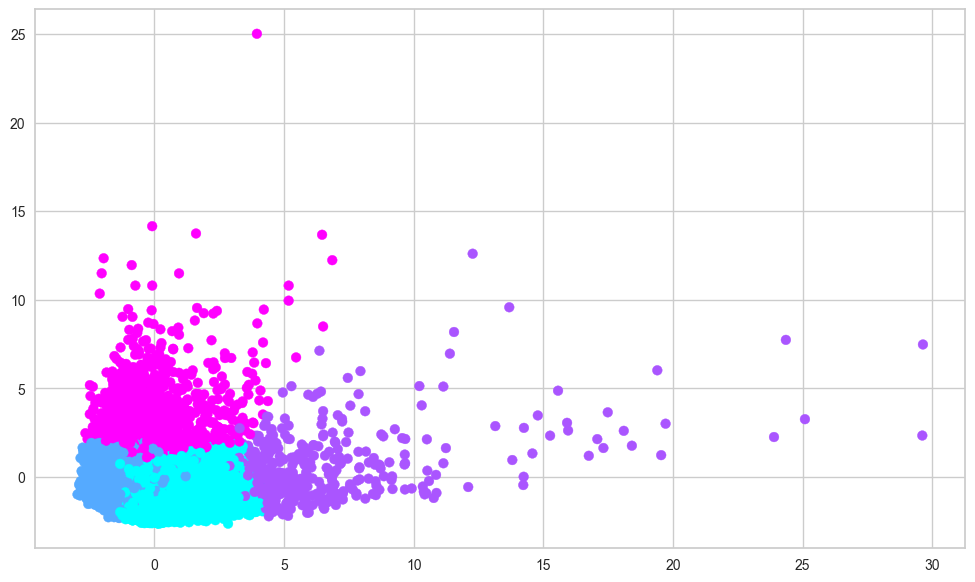

In [28]:
# Plot the data points in the 2-dimensional space with feature pca_1 and pca_2, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca2_df.pca_1, pca2_df.pca_2, c=kmeans_model.labels_, cmap="cool")
plt.show()

## TNS

### 2D

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123) # Initialize TSNE with the TSNE space dimension (n_components)
tsne_features_2d = tsne.fit_transform(scaled_data) # Project data (high dimension) to TSNE space (low dimension)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.001s...
[t-SNE] Computed neighbors for 8950 samples in 0.194s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.585618
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.968918
[t-SNE] KL divergence after 1000 iterations: 1.672311


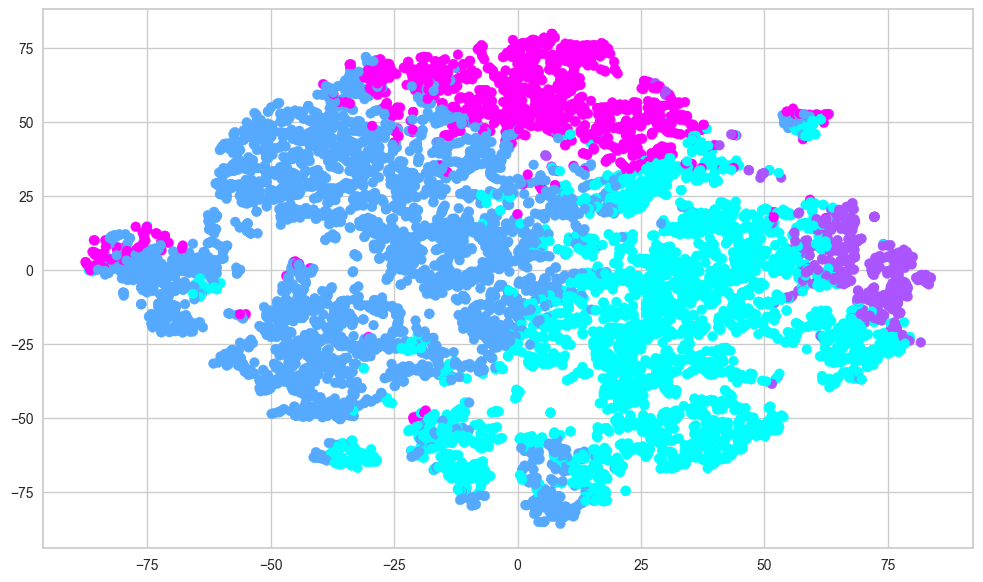

In [40]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(tsne_features_2d[:, 0], tsne_features_2d[:, 1], c=kmeans_model.labels_, cmap="cool")
plt.show()

### 3D

In [44]:
from sklearn.manifold import TSNE

X_TSNE_3d = TSNE(n_components=3, learning_rate='auto', init='random').fit_transform(scaled_data)

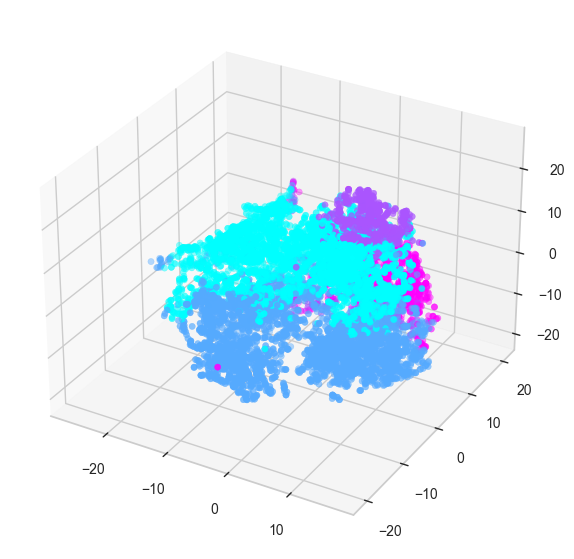

In [45]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(X_TSNE_3d[:, 0], X_TSNE_3d[:, 1], X_TSNE_3d[:, 2], c=kmeans_model.labels_, cmap="cool")
plt.show()

# Take sample

In [46]:
import pickle

file_name = "model.sav"                              
pickle.dump(kmeans_model, open(file_name, "wb"))     

In [48]:
file_name = "model.sav"
load_model = pickle.load(open(file_name, "rb"))

In [49]:
cluster = load_model.labels_
cluster_0 = np.where(cluster==0)   # indices of data samples in cluster 0
cluster_1 = np.where(cluster==1)   # indices of data samples in cluster 1
cluster_2 = np.where(cluster==2)   # indices of data samples in cluster 2
cluster_3 = np.where(cluster==3)

In [54]:
data.iloc[cluster_0].describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000
mean,4606.723798,889.331089,0.934940,1227.344225,585.816088,641.803825,206.658590,0.885432,0.296151,0.712188,0.042388,0.786205,22.023291,4196.019783,1319.902870,647.150195,0.268787,11.595999
std,2620.647763,1200.303515,0.161685,1030.198999,859.233454,625.444869,594.979988,0.150763,0.353200,0.313841,0.099860,2.040724,15.913278,3235.936960,1257.500490,1773.686361,0.356996,1.249658
min,2.000000,0.000000,0.000000,8.400000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.019163,0.000000,6.000000
25%,2290.000000,80.363442,1.000000,439.910000,0.000000,223.020000,0.000000,0.800000,0.000000,0.545455,0.000000,0.000000,12.000000,1500.000000,455.465188,161.278772,0.000000,12.000000
50%,4641.000000,336.640397,1.000000,888.960000,166.000000,450.000000,0.000000,1.000000,0.111111,0.833333,0.000000,0.000000,16.000000,3000.000000,936.605314,196.362677,0.083333,12.000000
75%,6935.000000,1255.901821,1.000000,1758.750000,890.900000,868.290000,0.000000,1.000000,0.583333,1.000000,0.000000,0.000000,28.000000,6000.000000,1774.318305,606.739379,0.500000,12.000000
max,8947.000000,8978.156324,1.000000,6520.000000,6520.000000,4538.840000,7894.578816,1.000000,1.000000,1.000000,0.750000,23.000000,186.000000,25000.000000,12020.180090,38512.124770,1.000000,12.000000


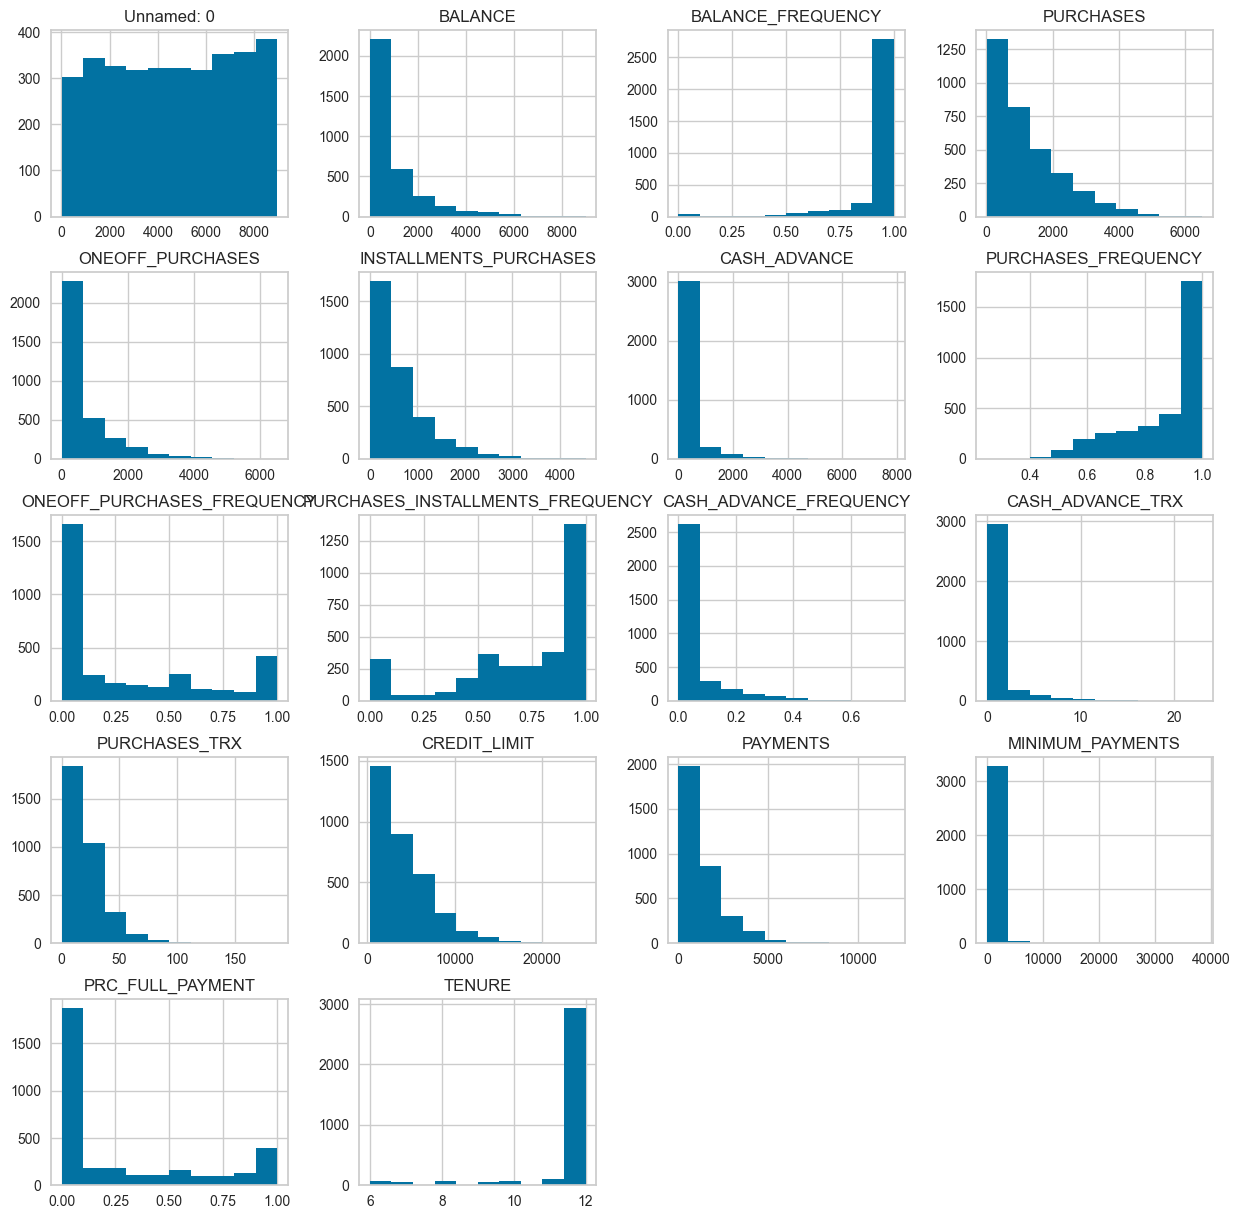

In [58]:
data.iloc[cluster_0].hist(figsize=(15, 15))
plt.show()

High purchases frequency and high balance

In [55]:
data.iloc[cluster_1].describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000
mean,4730.297548,1007.679281,0.790071,269.992232,209.124402,61.133516,602.079241,0.170475,0.085938,0.081277,0.116789,2.183934,2.911662,3262.199145,972.889554,587.959492,0.078053,11.438689
std,2556.140290,1084.633041,0.294757,468.411695,447.454002,157.169953,927.005673,0.188874,0.135438,0.149968,0.139649,3.097005,3.956263,2639.861939,1572.020537,1318.739211,0.205520,1.423913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2600.750000,82.764914,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,269.014246,160.891355,0.000000,12.000000
50%,4839.500000,765.128165,1.000000,78.400000,0.000000,0.000000,120.842528,0.083333,0.000000,0.000000,0.083333,1.000000,1.000000,2500.000000,535.666751,310.336181,0.000000,12.000000
75%,6960.500000,1505.001170,1.000000,338.925000,210.155000,51.372500,944.395746,0.333333,0.100000,0.083333,0.166667,3.000000,5.000000,4000.000000,1072.735531,654.909925,0.000000,12.000000
max,8949.000000,6937.806466,1.000000,4900.000000,4900.000000,3000.000000,6523.780195,1.000000,1.000000,0.857143,0.857143,31.000000,43.000000,23000.000000,29272.486070,28483.254830,1.000000,12.000000


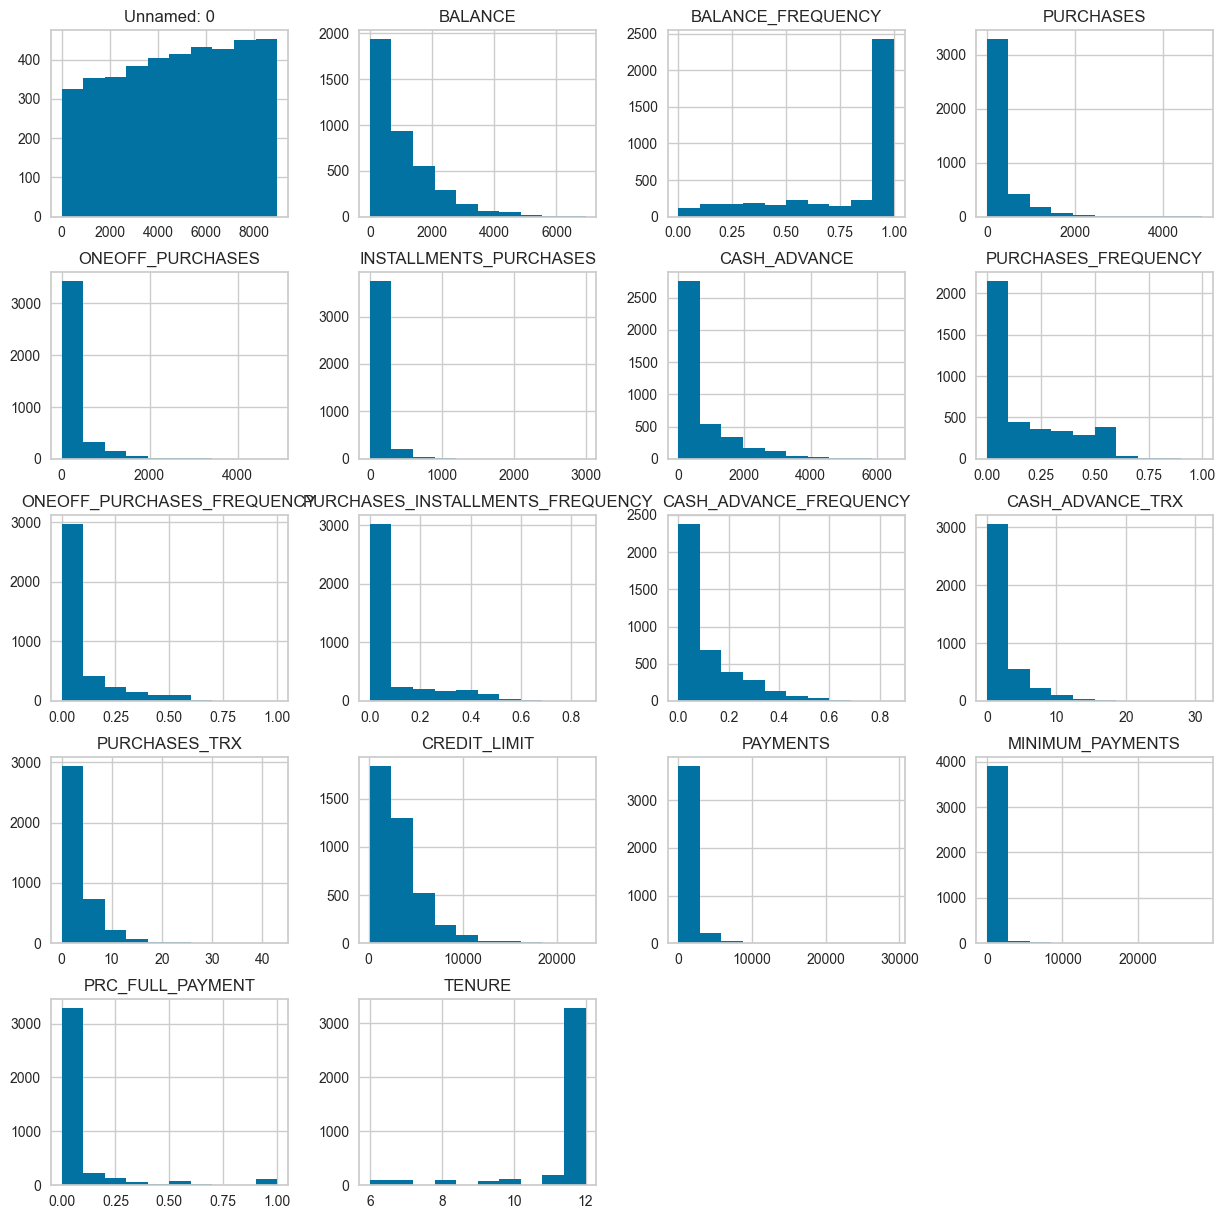

In [59]:
data.iloc[cluster_1].hist(figsize=(15, 15))
plt.show()

Low purchases frequency and high balance

In [56]:
data.iloc[cluster_2].describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,2992.138095,3521.042609,0.986962,7584.489286,5042.292048,2543.625810,652.256914,0.946154,0.735469,0.786865,0.070613,2.059524,88.219048,9721.547619,7220.051177,1954.694619,0.292929,11.947619
std,2233.814957,3335.379858,0.058581,5930.207112,5320.987721,2705.008867,1855.638576,0.133391,0.288326,0.312297,0.152145,6.013015,56.158611,4825.824894,6803.669589,5010.527164,0.395328,0.455273
min,6.000000,137.636267,0.272727,900.870000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,1000.000000,0.000000,108.937025,0.000000,6.000000
25%,918.250000,875.027003,1.000000,4544.107500,2265.312500,825.380000,0.000000,1.000000,0.583333,0.666667,0.000000,0.000000,52.000000,6000.000000,3593.520304,246.037459,0.000000,12.000000
50%,2502.500000,2468.157550,1.000000,5769.035000,3694.825000,1799.365000,0.000000,1.000000,0.833333,1.000000,0.000000,0.000000,77.500000,9000.000000,5383.505745,719.507067,0.000000,12.000000
75%,4709.750000,5165.936046,1.000000,8444.467500,6143.362500,3157.700000,284.886672,1.000000,1.000000,1.000000,0.083333,1.000000,110.000000,12000.000000,8298.780616,1887.416318,0.732955,12.000000
max,8737.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,62.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


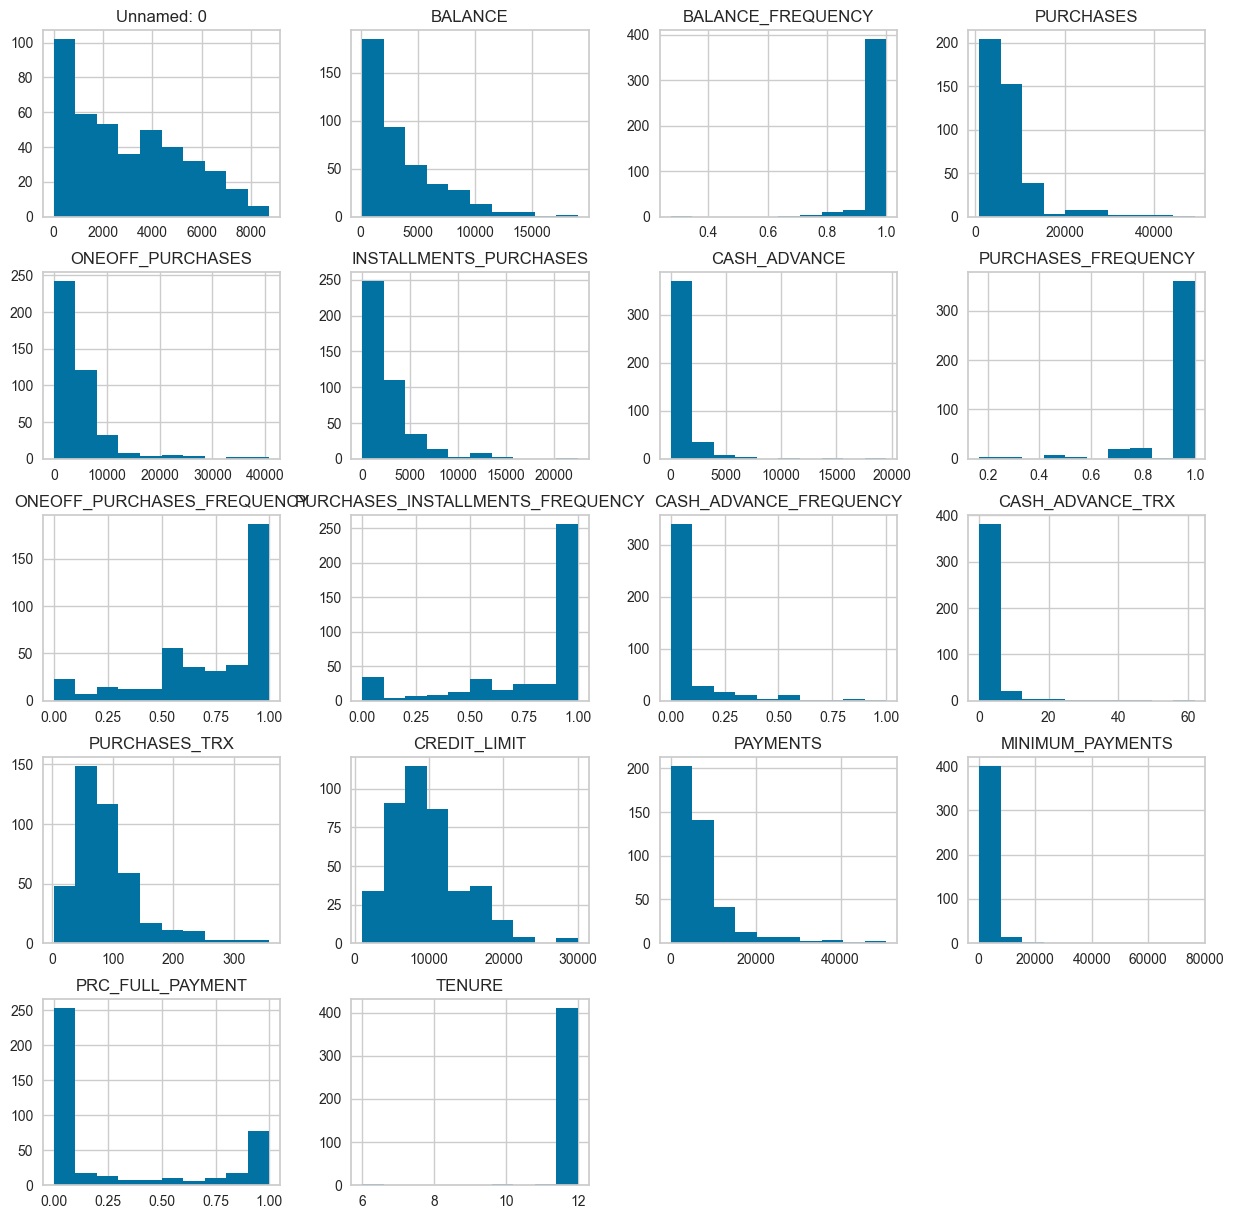

In [60]:
data.iloc[cluster_2].hist(figsize=(15, 15))
plt.show()

High purchase frequency and low balance

In [57]:
data.iloc[cluster_3].describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000,1185.000000
mean,3763.620253,4656.671384,0.969460,509.648093,326.576051,183.157840,4547.628934,0.290906,0.141672,0.186777,0.482056,14.221097,7.772152,7640.552359,3519.995453,2022.687495,0.034302,11.407595
std,2381.383333,2739.466532,0.089807,868.151677,671.737312,416.376282,3629.383609,0.355446,0.231346,0.312203,0.230449,12.374303,14.115668,3705.062514,4224.799085,3905.100462,0.102601,1.446142
min,1.000000,78.114579,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,16.950090,0.000000,6.000000
25%,1795.000000,2583.247881,1.000000,0.000000,0.000000,0.000000,2361.575780,0.000000,0.000000,0.000000,0.333333,7.000000,0.000000,5000.000000,1229.434538,763.877119,0.000000,12.000000
50%,3490.000000,4350.643699,1.000000,99.000000,0.000000,0.000000,3682.382663,0.083333,0.000000,0.000000,0.500000,11.000000,1.000000,7000.000000,1987.223626,1315.504162,0.000000,12.000000
75%,5622.000000,6262.211034,1.000000,669.930000,340.190000,156.000000,5603.126858,0.583333,0.166667,0.333333,0.666667,17.000000,10.000000,10000.000000,4103.032597,2044.554634,0.000000,12.000000
max,8941.000000,16304.889250,1.000000,7194.530000,6678.260000,4059.930000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,142.000000,21500.000000,39048.597620,61031.618600,1.000000,12.000000


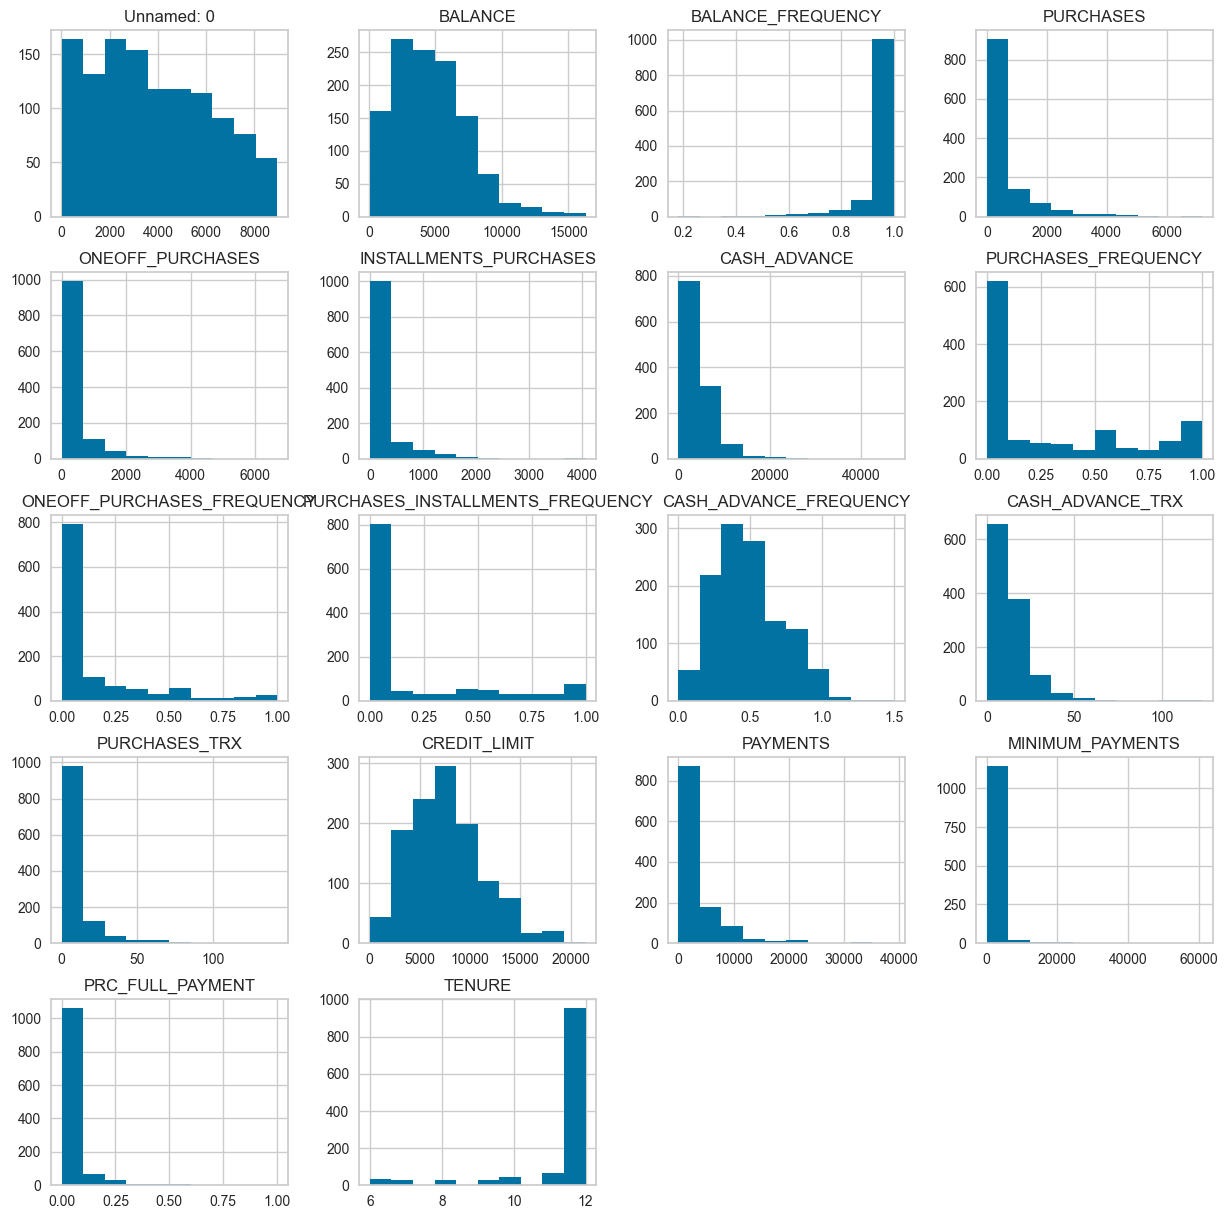

In [61]:
data.iloc[cluster_3].hist(figsize=(15, 15))
plt.show()

Low purchases frequency and low balance